# Modèle Linéaire : Classification

### Importation de la lib :

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes as ctypes

lib_path = "./../../../../mylib/target/release/mylib.dll"
my_lib = ctypes.cdll.LoadLibrary(lib_path)

## --------------------------init_linear_model--------------------------
# pub extern "C" fn init_linear_model(input_count: u32) -> *mut LinearModel;
my_lib.init_linear_model.argtypes = [ctypes.c_uint32]
my_lib.init_linear_model.restype = ctypes.c_void_p

# pub extern "C" fn train_linear_model(model: *mut LinearModel, features: *const c_float, labels: *const c_float, data_size: u32, learning_rate: f32, epochs: u32)
my_lib.train_linear_model.argtypes = [ctypes.c_void_p, ctypes.POINTER(ctypes.c_float), ctypes.POINTER(ctypes.c_float),
                                      ctypes.c_uint32, ctypes.c_float, ctypes.c_uint32]
my_lib.train_linear_model.restype = None

# pub extern "C" fn predict_linear_model(model: *mut LinearModel, inputs: *mut f32) -> c_float
my_lib.predict_linear_model.argtypes = [ctypes.c_void_p, ctypes.POINTER(ctypes.c_float)]
my_lib.predict_linear_model.restype = ctypes.c_float

# pub extern "C" fn free_linear_model(model: *mut LinearModel)
my_lib.free_linear_model.argtypes = [ctypes.c_void_p]
my_lib.free_linear_model.restype = None

## Linear simple :

In [2]:
linear_model = my_lib.init_linear_model(2)

In [3]:
X = np.array([
    [1, 1],
    [2, 3],
    [3, 3]
])
Y = np.array([
    1,
    -1,
    -1
])

X_flat = X.flatten().astype(ctypes.c_float)
Y_flat = Y.flatten().astype(ctypes.c_float)
X_flat_ptr = X_flat.ctypes.data_as(ctypes.POINTER(ctypes.c_float))
Y_flat_ptr = Y_flat.ctypes.data_as(ctypes.POINTER(ctypes.c_float))
data_size = len(Y)

my_lib.train_linear_model(linear_model, X_flat_ptr, Y_flat_ptr, data_size, 0.01, 1000000)

background_points = []
background_colors = []

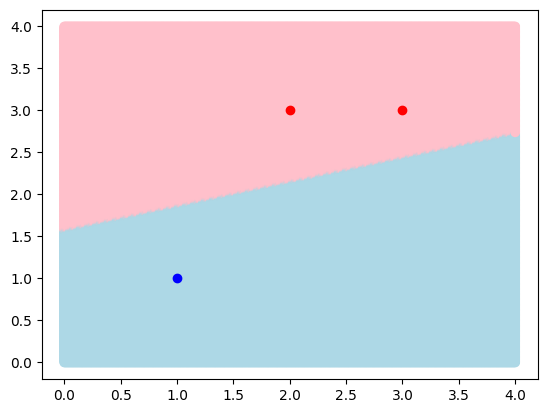

In [4]:
x1 = 0
while x1 < 4:
    x2 = 0
    while x2 < 4:
        background_points.append([x1, x2])
        points_pointer = np.ctypeslib.as_ctypes(np.array([x1, x2], dtype=ctypes.c_float))
        if my_lib.predict_linear_model(linear_model, points_pointer) >= 0:
            background_colors.append('lightblue')
        else:
            background_colors.append('pink')
        x2 += 0.01
    x1 += 0.01

background_points = np.array(background_points)
plt.scatter(background_points[:, 0], background_points[:, 1], c=background_colors)
plt.scatter(X[0, 0], X[0, 1], color='blue')
plt.scatter(X[1:3, 0], X[1:3, 1], color='red')

plt.show()

In [5]:
my_lib.free_linear_model(linear_model)